## Лабораторная работа №4
### Анна Гаврилина
### Вариант 6: 4.1.6, 4.2, 4.5.2, 4.7.2

## Задача 4.1.6 

Дана система уравнений Ax=b. Найти решение системы с помощью метода Гаусса. Выполнить 10 итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Задаю матрицу A и вектор b
A = np.array([[7.92, 3.36, -2.24, 1.98],
            [-13.86, 18.20, 0, 3.96],
            [-2.97, 0.20, 4.80, 0],
            [5.94, 0, -10.60, 16.83]])
b = np.array([-1.956, 62.8, -4.16, 48.31])

In [14]:
#Решение СЛАУ 
x = np.linalg.solve(A,b)
print("Solution: \n",x.reshape(4,1))

Solution: 
 [[-2.02228096]
 [ 1.42904531]
 [-2.17749656]
 [ 2.21276799]]


In [7]:
#Приведеение системы к удобному для итераций виду - x=Bx+c
n = len(b)
B = np.zeros([n,n])
c = np.zeros(n)

In [8]:
for i in range(n):
    c[i] = b[i]/A[i][i]
    for j in range(n):
        if j != i:
            B[i,j] = -A[i,j]/A[i,i]

##### Проверка выполнения достаточного условия сходимости: ||B||∞<1

In [12]:
print('||B|| =',np.linalg.norm(B,np.inf))

||B|| = 0.9827688651218064


Меньше 1, условие выполнено

In [40]:
#Метод Зейделя
def Seidel(B,c,max_iter,x0,eps):
    x_buf = x0
    for i in range(max_iter):
        tmp = x_buf
        x_buf = np.dot(B,tmp) + c
        if (np.linalg.norm(x_buf - tmp,np.inf) < eps):
            return x_buf
    return x_buf



In [41]:
iterations = 10
eps = 1e-5

x01 = np.zeros(n)

my_x1 = Seidel(B,c,10,x01,eps)
my_x1 = np.round(my_x,5)
print("Result when x0=[0,0,0,0]:\n", my_x.reshape(4,1))


Result when x0=[0,0,0,0]:
 [[-2.01905]
 [ 1.43132]
 [-2.17344]
 [ 2.20019]]


#### Величина абсолютной погрешности итерационного решения

In [42]:
print("Величина абсолютной погрешности итерационного решения:",np.linalg.norm(x - my_x,np.inf))

Величина абсолютной погрешности итерационного решения: 0.012577992371523461


Другое начальное приближение, очень близкое к истинному решению

In [50]:
x02 = [2,1,-2,2]
my_x2 = Seidel(B,c,10,x02,eps)
my_x2 = np.round(my_x2,5)
print("\nResult when x0=[-2,1,-2,2]:\n", my_x.reshape(4,1))


Result when x0=[-2,1,-2,2]:
 [[-2.01905]
 [ 1.43132]
 [-2.17344]
 [ 2.20019]]


In [49]:
print("Величина абсолютной погрешности итерационного решения:",np.linalg.norm(x - my_x2,np.inf))

Величина абсолютной погрешности итерационного решения: 0.009057992371523493


Абсолютная погрешность серьзено уменьшилась, но все еще превосходит eps=1e-5. 10 итераций не достатчно для получения желаемой точности.

## Задача 4.2

Для системы уравнений Ax=b из задачи 4.1 найти решение по методу Зейделя с точностью ε= 10−6 , взяв любое начальное приближение. Предусмотреть подсчет количества итераций, потребовавшихся для достижения точности ε.

In [56]:
#Метод Зейделя с подсчетом количества итераций
def Seidel1(B, c, max_iter, x0, eps):
    count = 0
    x_buf = x0
    for i in range(max_iter):
        count += 1
        tmp = x_buf
        x_buf = np.dot(B,tmp) + c
        if (np.linalg.norm(x_buf - tmp,np.inf) < eps):
            return x_buf, count
    return x_buf, count

In [54]:
eps1 = 1e-6
max_iter = 1e-3

In [55]:
x03 = [1,1,1,1]

In [61]:
my_x3, counter = Seidel1(B, c, max_iter, x03, eps1)
my_x3 = np.round(my_x3,5)
print("\nResult when x0=[1,1,1,1]:\n", my_x.reshape(4,1))
print("\nКоличетсво итераций: ", counter)


Result when x0=[1,1,1,1]:
 [[-2.01905]
 [ 1.43132]
 [-2.17344]
 [ 2.20019]]

Количетсво итераций:  27


## Задача 4.5.2

Дана система уравнений Ax=b, где A – симметричная положительно определенная матрица. Найти решение системы с точностью ε =10−5 с помощью метода релаксации (для этого модифицировать функцию
zeid, реализующую метод Зейделя). Определить экспериментально параметр релаксации ω, при котором точность ε достигается при наименьшем числе итераций. Построить график зависимости числа итераций от параметра релаксации.



Задание матрицы А и веткора b

In [64]:
A = np.array([[3.2, 0.3, 0.9, -0.7, 1.1],
             [0.3, 8.1, 1.8, -2., 0.8],
             [0.9, 1.8, 4.1, -0.1, 0.2],
             [-0.7, -2., -0.1, 3.6, -0.6],
             [1.1, 0.8, 0.2, -0.6, 4]])
b = np.array([1., 0, 3.2, -2., -3. ])

In [70]:
print("A: \n",A)
print("'b: \n",b.reshape(5,1))

A: 
 [[ 3.2  0.3  0.9 -0.7  1.1]
 [ 0.3  8.1  1.8 -2.   0.8]
 [ 0.9  1.8  4.1 -0.1  0.2]
 [-0.7 -2.  -0.1  3.6 -0.6]
 [ 1.1  0.8  0.2 -0.6  4. ]]
'b: 
 [[ 1. ]
 [ 0. ]
 [ 3.2]
 [-2. ]
 [-3. ]]


In [86]:
x_task5 = np.linalg.solve(A,b)
print("SOLUTION: \n",x_task5)

SOLUTION: 
 [ 0.22687671 -0.31839504  0.8952413  -0.81610733 -0.91589025]


Метод релаксации SOR (модифицирую метод Зейделя)

In [73]:
def SOR(B, c, max_iter, x0, eps, omega):
    count = 0
    x_buf = x0
    for i in range(max_iter):
        count += 1
        tmp = x_buf
        x_buf = np.dot(B,tmp) + c
        x_buf = omega * x_buf + (1 - omega) * tmp
        if (np.linalg.norm(x_buf - tmp,np.inf) < eps):
            return x_buf, count
    return x_buf, count

In [85]:
n = len(b)
B = np.zeros([n,n])
c = np.zeros(n)
for i in range(n):
    c[i] = b[i]/A[i][i]
    for j in range(n):
        if j != i:
            B[i,j] = -A[i,j]/A[i,i]
            
x0 = np.array([1,1,1,1,1])
x_SOR, count = SOR(B, c , 1000, x0, 1e-5, 0.4 )
print('SOR RESULT :\n',np.round(x_SOR, 5))
print('\nКоличество итераций:',count)

SOR RESULT :
 [ 0.22692 -0.31836  0.8952  -0.81606 -0.91591]

Количество итераций: 51


##### График зависимости числа итераций от параметра релаксации.

In [109]:
omegas = np.linspace(0.1, 2, 20)
iterations = []
for i in omegas:
    x_SOR, iter = SOR(B, c, 1000, x0, 1e-5, i)
    iterations.append(iter)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in add
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in subtract
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  


Text(0, 0.5, 'NUMBER of ITERATIONS')

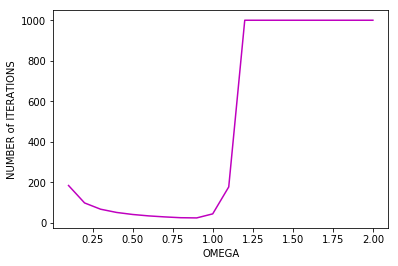

In [110]:
plt.plot(omegas, iterations,c='m')
plt.xlabel('OMEGA')
plt.ylabel('NUMBER of ITERATIONS')

## Задача 4.7.2

Дана система уравнений Ax=b, где A – симметричная положительно определенная матрица
размерности n х n. Найти решение системы с точностью ε=10−6 с помощью метода простой итерации с
оптимальным выбором итерационного параметра, а также с помощью метода, указанного в индивидуальном варианте. (Для метода релаксации обосновать выбор параметра релаксации ω.) Сравнить скорость сходимости
методов.
УКАЗАНИЕ. При проверке необходимого и достаточного условия сходимости итерационных методов для нахождения собственных значений матриц воспользоваться встроенной функцией eigenvals(M) пакета MATHCAD (либо функцией numpy.linalg.eigvals), возвращающей собственные значения матрицы M.

In [189]:
# Задаю матрицу А и вектор b
n = 30
m = 2

In [190]:
q = 0.993 + (-1)**m * m * 10**(-4)
tau = np.sum([q**(2*i) for i in range(1,n+1)])

In [191]:
t = m + n
b = np.array([t*q**(i) for i in range(1,n+1)])

In [192]:
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if (i != j):
            A[i][j] = tau + (q**i + q**j) * t
        else:
            A[i][j] = tau+2 * q**(i) * t + t**2

In [183]:
np.linalg.det(A)

1.5531373502007073e+131

In [193]:
x_res = np.linalg.solve(A, b)
print("Решение библиотечной функции:\n", x_res.reshape(x_res.size,1))

Решение библиотечной функции:
 [[0.01038278]
 [0.01022414]
 [0.01006658]
 [0.00991009]
 [0.00975466]
 [0.0096003 ]
 [0.00944698]
 [0.0092947 ]
 [0.00914346]
 [0.00899325]
 [0.00884406]
 [0.00869588]
 [0.00854871]
 [0.00840254]
 [0.00825737]
 [0.00811318]
 [0.00796998]
 [0.00782774]
 [0.00768648]
 [0.00754617]
 [0.00740682]
 [0.00726842]
 [0.00713096]
 [0.00699443]
 [0.00685883]
 [0.00672416]
 [0.0065904 ]
 [0.00645754]
 [0.0063256 ]
 [0.00619455]]


In [194]:
#Приведение системы к удобному для итераций виду
n = len(b)
B = np.zeros([n,n])
c = np.zeros(n)
for i in range(n):
    c[i] = b[i]/A[i][i]
    for j in range(n):
        if j != i:
            B[i,j] = -A[i,j]/A[i,i]
            

In [201]:
def Jacobi(x0, B, c, max_iter, eps):
    norm = np.linalg.norm(B, ord = np.inf)
    eps = eps * (1-norm) / norm
    count = 0
    for i in range(max_iter):
        count += 1
        x = c - np.dot(B,x0)
        if np.linalg.norm(x-x0, ord = np.inf) < eps:
            return x, count
        else:
            x0 = np.copy(x)
    return x, count

In [215]:
x0 = x_res - 0.001
x_Jac = Jacobi(x0, B, c, 10000, 1e-6)
print('Количество итераций до сходимости: ', res_jac[1])
print(x_Jac)

Количество итераций до сходимости:  1000
(array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan]), 10000)


Метод простой итерации не работает... Попробую метод релаксации из предыдущей задачи.

In [226]:
x_SOR, count = SOR(B, c , 1000, x0, 1e-6, 0.4 )

In [227]:
print("Количество итераций:", count)

Количество итераций: 8


Наилучшее значение параметра релаксации омега 

In [237]:
omegas = np.linspace(0.1, 2, 50)
iterations = []
for w in omegas:
    x, it = SOR(B, c , 1000, x0, 1e-6, w )
    iterations.append(it)

w_optim = omegas[iterations.index(min(iterations))]
print("Оптимальное значение параметра релаксации w: ", np.round(w_optim,6))
print("Решение: \n", np.round(SOR(B, c , 1000, x0, 1e-6, w_optim )[0].reshape(n,1),6))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in subtract
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in add
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in multiply
  


Оптимальное значение параметра релаксации w:  0.332653
Решение: 
 [[0.010385]
 [0.010226]
 [0.010068]
 [0.009912]
 [0.009756]
 [0.009602]
 [0.009448]
 [0.009296]
 [0.009144]
 [0.008994]
 [0.008845]
 [0.008696]
 [0.008549]
 [0.008403]
 [0.008257]
 [0.008113]
 [0.00797 ]
 [0.007827]
 [0.007686]
 [0.007545]
 [0.007406]
 [0.007267]
 [0.00713 ]
 [0.006993]
 [0.006857]
 [0.006723]
 [0.006589]
 [0.006456]
 [0.006324]
 [0.006193]]
